** So sánh Softmax Regression với MLP (dùng Pytourch) **

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv

In [80]:
auto = fetch_openml(name="autoMpg", version=1, as_frame=True)
df = auto.frame.copy()

df = df.dropna()
print(df.head())
df.shape


  cylinders  displacement  horsepower  weight  acceleration model origin  \
0         8         307.0       130.0    3504          12.0    70      1   
1         8         350.0       165.0    3693          11.5    70      1   
2         8         318.0       150.0    3436          11.0    70      1   
3         8         304.0       150.0    3433          12.0    70      1   
4         8         302.0       140.0    3449          10.5    70      1   

   class  
0   18.0  
1   15.0  
2   18.0  
3   16.0  
4   17.0  


(392, 8)

In [ ]:
y = df['class'].values.astype(float)
x = df.drop(columns=['class']).values.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42 )

x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313,) (79,)


In [62]:
class SoftRegressionModel:
    def __init__(self, input_dim, output_dim, lr=0.1, epochs = 200):
        self.model = nn.Linear(input_dim, output_dim)
        self.lr = lr
        self.epochs = epochs
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.lr)
        self.criterion = nn.CrossEntropyLoss()

        self.list_loss = []
    
    def forward(self, x):
        return self.model(x)
    
    def train(self, x_train, y_train):
        x_train_tensor = torch.FloatTensor(x_train)
        y_train_tensor = torch.LongTensor(y_train)

        for epoch in range(self.epochs):
            self.optimizer.zero_grad()

            self.model.train()
            
            outputs = self.forward(x_train_tensor)
            
            loss = self.criterion(outputs, y_train_tensor)
            loss.backward()
            self.optimizer.step()
            
            self.list_loss.append(loss.item())
            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss.item():.4f}')

    def predict(self, x):
        self.model.eval()
        outputs = self.forward(x)
        predicted = torch.max(outputs.data, 1)
        return predicted

Epoch [10/1000], Loss: 5.0357
Epoch [20/1000], Loss: 5.0151
Epoch [30/1000], Loss: 4.9946
Epoch [40/1000], Loss: 4.9743
Epoch [50/1000], Loss: 4.9541
Epoch [60/1000], Loss: 4.9339
Epoch [70/1000], Loss: 4.9139
Epoch [80/1000], Loss: 4.8941
Epoch [90/1000], Loss: 4.8743
Epoch [100/1000], Loss: 4.8547
Epoch [110/1000], Loss: 4.8352
Epoch [120/1000], Loss: 4.8158
Epoch [130/1000], Loss: 4.7965
Epoch [140/1000], Loss: 4.7774
Epoch [150/1000], Loss: 4.7583
Epoch [160/1000], Loss: 4.7394
Epoch [170/1000], Loss: 4.7207
Epoch [180/1000], Loss: 4.7021
Epoch [190/1000], Loss: 4.6836
Epoch [200/1000], Loss: 4.6652
Epoch [210/1000], Loss: 4.6470
Epoch [220/1000], Loss: 4.6289
Epoch [230/1000], Loss: 4.6109
Epoch [240/1000], Loss: 4.5931
Epoch [250/1000], Loss: 4.5755
Epoch [260/1000], Loss: 4.5580
Epoch [270/1000], Loss: 4.5406
Epoch [280/1000], Loss: 4.5234
Epoch [290/1000], Loss: 4.5064
Epoch [300/1000], Loss: 4.4895
Epoch [310/1000], Loss: 4.4728
Epoch [320/1000], Loss: 4.4562
Epoch [330/1000],

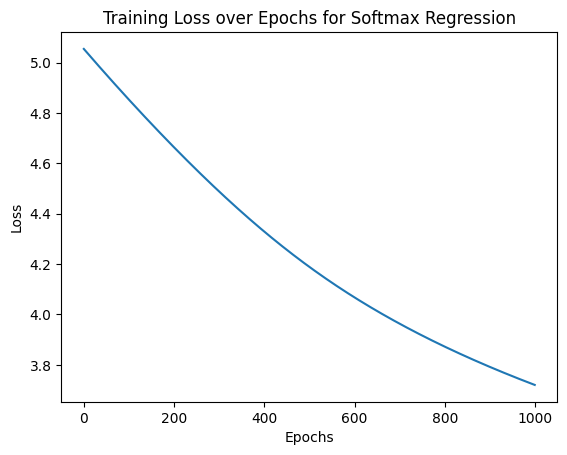

In [82]:
model1 = SoftRegressionModel(input_dim=x_train.shape[1], output_dim=len(np.unique(y_train)), lr=0.01, epochs=1000)
model1.train(x_train, y_train)

plt.plot(model1.list_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for Softmax Regression')
plt.show()

In [64]:
class MLP:
    def __init__(self, input_dim, output_dim, lr=0.1, epochs=500):
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=lr)
        self.epochs = epochs
        self.list_loss = []

    def train(self, x_train, y_train):
        x_train_tensor = torch.FloatTensor(x_train)
        y_train_tensor = torch.LongTensor(y_train)

        for epoch in range(self.epochs):
            self.model.train()
            self.optimizer.zero_grad()

            outputs = self.forward(x_train_tensor)
            loss = self.criterion(outputs, y_train_tensor)
            loss.backward()

            self.optimizer.step()
            self.list_loss.append(loss.item())

            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss.item():.4f}')

    def forward(self, x):
        outputs = self.model(x)
        return outputs

Epoch [10/1000], Loss: 4.7299
Epoch [20/1000], Loss: 4.6527
Epoch [30/1000], Loss: 4.5776
Epoch [40/1000], Loss: 4.5047
Epoch [50/1000], Loss: 4.4345
Epoch [60/1000], Loss: 4.3672
Epoch [70/1000], Loss: 4.3031
Epoch [80/1000], Loss: 4.2424
Epoch [90/1000], Loss: 4.1852
Epoch [100/1000], Loss: 4.1314
Epoch [110/1000], Loss: 4.0808
Epoch [120/1000], Loss: 4.0330
Epoch [130/1000], Loss: 3.9878
Epoch [140/1000], Loss: 3.9449
Epoch [150/1000], Loss: 3.9041
Epoch [160/1000], Loss: 3.8652
Epoch [170/1000], Loss: 3.8280
Epoch [180/1000], Loss: 3.7924
Epoch [190/1000], Loss: 3.7581
Epoch [200/1000], Loss: 3.7251
Epoch [210/1000], Loss: 3.6933
Epoch [220/1000], Loss: 3.6626
Epoch [230/1000], Loss: 3.6329
Epoch [240/1000], Loss: 3.6041
Epoch [250/1000], Loss: 3.5763
Epoch [260/1000], Loss: 3.5493
Epoch [270/1000], Loss: 3.5231
Epoch [280/1000], Loss: 3.4977
Epoch [290/1000], Loss: 3.4731
Epoch [300/1000], Loss: 3.4491
Epoch [310/1000], Loss: 3.4259
Epoch [320/1000], Loss: 3.4033
Epoch [330/1000],

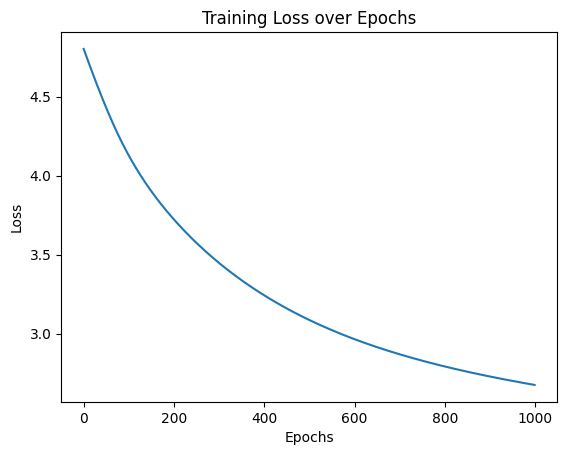

In [83]:
model2 = MLP(input_dim=x_train.shape[1], output_dim=len(np.unique(y_train)), lr=0.01, epochs=1000)

model2.train(x_train, y_train)
plt.plot(model2.list_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [84]:
x_test_tensor = torch.FloatTensor(x_test)   
y_test_tensor = torch.LongTensor(y_test)

acc1 = nn.CrossEntropyLoss()(model1.forward(x_test_tensor), y_test_tensor).item()
acc2 = nn.CrossEntropyLoss()(model2.forward(x_test_tensor), y_test_tensor).item()

print(f'Softmax Regression Test Accuracy: {acc1:.4f}')
print(f'MLP Test Accuracy: {acc2:.4f}')

Softmax Regression Test Accuracy: 3.8271
MLP Test Accuracy: 3.0279
